In [1]:

import pandas as pd

In [2]:
df = pd.read_csv('artikel-jadi.csv')
df.head()

,Judul,Tanggal,Penulis,Editor,Isi Artikel,Kategori
0,Susno Duadji dan Hotman Paris Beda Pendapat so...,"Selasa, 30 Juli 2024 21:25 WIB",Hasanudin Aco,Editor tidak ditemukan,"TRIBUNNEWS.COM, JAKARTA - Pengacara kondang H...",nasional
1,BREAKING NEWS: Jokowi Benarkan Adanya Pemotong...,"Senin, 27 Mei 2024 22:42 WIB",Taufik Ismail,Acos Abdul Qodir,Laporan Wartawan Tribunnews Taufik Ismail\nTRI...,nasional
2,6 'Kemewahan' Nayunda dari SYL: Saweran Ratusa...,"Rabu, 29 Mei 2024 21:31 WIB",Faryyanida Putwiliani,Garudea Prabawati,TRIBUNNEWS.COM - Penyanyi dangdut Nayunda Nabi...,nasional
3,Peran Ditjen Administrasi Hukum Umum Diganjar ...,"Rabu, 21 Agustus 2024 20:45 WIB",Ilham Rian Pratama,Wahyu Aji,"TRIBUNNEWS.COM, JAKARTA - Direktorat Jenderal ...",nasional
4,"Senator Bali Dipecat Badan Kehormatan DPD RI, ...","Jumat, 2 Februari 2024 18:09 WIB",Chaerul Umam,Dodi Esvandi,"Laporan Wartawan Tribunnews.com, Chaerul Umam\...",nasional


In [3]:
# exploratory data analysis
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27754 entries, 0 to 27753
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Judul        27754 non-null  object
 1   Tanggal      27754 non-null  object
 2   Penulis      27754 non-null  object
 3   Editor       27754 non-null  object
 4   Isi Artikel  27753 non-null  object
 5   Kategori     27754 non-null  object
dtypes: object(6)
memory usage: 1.3+ MB
None


Kategori
regional         5000
internasional    4998
pendidikan       4998
metropolitan     4989
nasional         4854
lifestyle        2915
Name: count, dtype: int64


<Axes: xlabel='Kategori'>

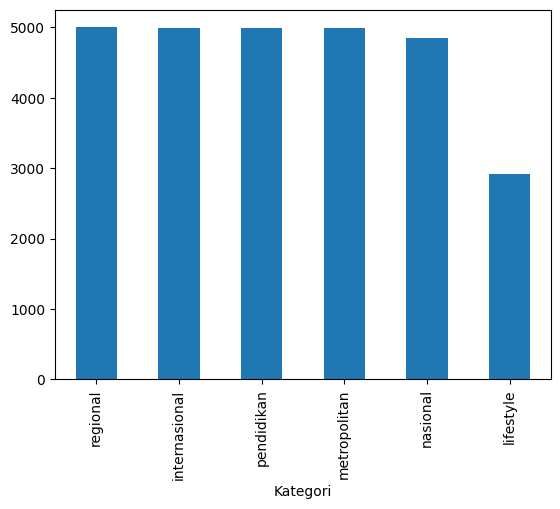

In [4]:
# tampilkan distribusi data katagori
print(df['Kategori'].value_counts())
# visualisasi distribusi data katagori
df['Kategori'].value_counts().plot(kind='bar')

In [6]:
#cek isian data kosong

print(df.isnull().sum())

Judul          0
Tanggal        0
Penulis        0
Editor         0
Isi Artikel    1
Kategori       0
dtype: int64


In [12]:
#hapus baris data yang kosong
df = df.dropna()
print(df.isnull().sum())

Judul          0
Tanggal        0
Penulis        0
Editor         0
Isi Artikel    0
Kategori       0
dtype: int64


Kategori
regional         5000
internasional    4998
pendidikan       4998
metropolitan     4988
nasional         4854
lifestyle        2915
Name: count, dtype: int64


<Axes: xlabel='Kategori'>

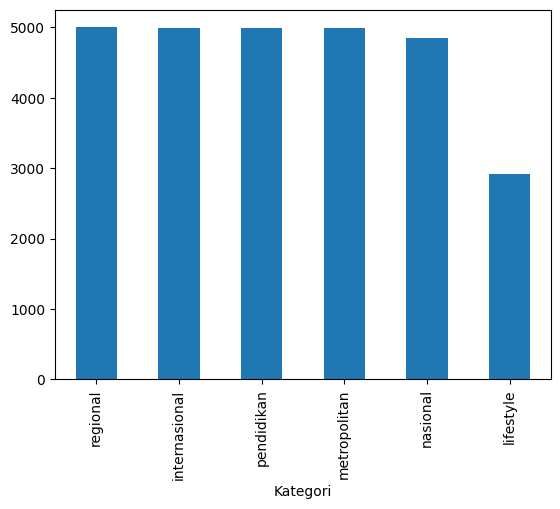

In [13]:
# tampilkan distribusi data katagori
print(df['Kategori'].value_counts())
# visualisasi distribusi data katagori
df['Kategori'].value_counts().plot(kind='bar')

In [14]:
import re

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Menghapus URL
    text = re.sub(r'http\S+', '', text)
    # Menghapus karakter non-alfabet dan mengubahnya menjadi huruf kecil
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    # Menghapus spasi berlebih
    text = ' '.join(text.split())
    # # Menghapus angka
    # text = re.sub(r'\d+', '', text)
    # menghapus tag html
    text = re.sub(r'<.*?>', '', text)
    # menghapus karakter tanda baca
    text = re.sub(r'[^\w\s]', '', text)
    # menghapus -, +, *, /, =, dll
    text = re.sub(r'[-+*/=]', '', text)
    return text

# # Menerapkan fungsi pembersihan ke kolom "Isi Artikel" dan "Judul"
# df['juduldf['Isi Artikel'].apply(clean_text)
# df['Judul'].apply(clean_text)

# # Fill NaN values with an empty string
# df['Judul'] = df['Judul'].fillna('')
# df['Isi Artikel'] = df['Isi Artikel'].fillna('')

df['Judul'] = df['Judul'].apply(clean_text)
df['Isi Artikel'] = df['Isi Artikel'].apply(clean_text)

In [16]:
df.head()


,Judul,Tanggal,Penulis,Editor,Isi Artikel,Kategori
0,susno duadji dan hotman paris beda pendapat so...,"Selasa, 30 Juli 2024 21:25 WIB",Hasanudin Aco,Editor tidak ditemukan,tribunnewscom jakarta pengacara kondang hotman...,nasional
1,breaking news jokowi benarkan adanya pemotonga...,"Senin, 27 Mei 2024 22:42 WIB",Taufik Ismail,Acos Abdul Qodir,laporan wartawan tribunnews taufik ismail trib...,nasional
2,6 kemewahan nayunda dari syl saweran ratusan j...,"Rabu, 29 Mei 2024 21:31 WIB",Faryyanida Putwiliani,Garudea Prabawati,tribunnewscom penyanyi dangdut nayunda nabila ...,nasional
3,peran ditjen administrasi hukum umum diganjar ...,"Rabu, 21 Agustus 2024 20:45 WIB",Ilham Rian Pratama,Wahyu Aji,tribunnewscom jakarta direktorat jenderal admi...,nasional
4,senator bali dipecat badan kehormatan dpd ri l...,"Jumat, 2 Februari 2024 18:09 WIB",Chaerul Umam,Dodi Esvandi,laporan wartawan tribunnewscom chaerul umam tr...,nasional


In [9]:
%pip install Sastrawi


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
%pip install nltk


   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 1.2 MB/s eta 0:00:01
   -------------------- ------------------- 0.8/1.5 MB 1.1 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 1.0 MB/s eta 0:00:01
   --------------------------- ------------ 1.0/1.5 MB 1.0 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.0 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
#menghapus kata tribunnews
def remove_tribunnews(text):
    text = text.replace('tribunnewscom', '')
    return text

# Menerapkan fungsi remove_tribunnews ke kolom "Isi Artikel" dan "Judul"
df['Judul'] = df['Judul'].apply(remove_tribunnews)
df['Isi Artikel'] = df['Isi Artikel'].apply(remove_tribunnews)

In [18]:
df.head()

,Judul,Tanggal,Penulis,Editor,Isi Artikel,Kategori
0,susno duadji dan hotman paris beda pendapat so...,"Selasa, 30 Juli 2024 21:25 WIB",Hasanudin Aco,Editor tidak ditemukan,jakarta pengacara kondang hotman paris beda p...,nasional
1,breaking news jokowi benarkan adanya pemotonga...,"Senin, 27 Mei 2024 22:42 WIB",Taufik Ismail,Acos Abdul Qodir,laporan wartawan tribunnews taufik ismail jak...,nasional
2,6 kemewahan nayunda dari syl saweran ratusan j...,"Rabu, 29 Mei 2024 21:31 WIB",Faryyanida Putwiliani,Garudea Prabawati,penyanyi dangdut nayunda nabila nizrinah ikut...,nasional
3,peran ditjen administrasi hukum umum diganjar ...,"Rabu, 21 Agustus 2024 20:45 WIB",Ilham Rian Pratama,Wahyu Aji,jakarta direktorat jenderal administrasi huku...,nasional
4,senator bali dipecat badan kehormatan dpd ri l...,"Jumat, 2 Februari 2024 18:09 WIB",Chaerul Umam,Dodi Esvandi,laporan wartawan chaerul umam jakarta ketua ...,nasional


In [22]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

# Membuat fungsi stopword removal dan stemming
def stopwordd(text):
    text = stopword.remove(text)
    return text

# # Menggabungkan token kembali menjadi string sebelum menerapkan fungsi stopword removal
# df['Judul'] = df['Judul'].apply(lambda x: ' '.join(x))
# df['Isi Artikel'] = df['Isi Artikel'].apply(lambda x: ' '.join(x))

# Menerapkan fungsi stopword removal ke kolom "Isi Artikel" dan "Judul"
df['Judul'] = df['Judul'].apply(stopwordd)
df['Isi Artikel'] = df['Isi Artikel'].apply(stopwordd)

In [35]:
df.head()

,Judul,Tanggal,Penulis,Editor,Isi Artikel,Kategori
0,susno duadji hotman paris beda pendapat soal p...,"Selasa, 30 Juli 2024 21:25 WIB",Hasanudin Aco,Editor tidak ditemukan,jakarta pengacara kondang hotman paris beda pe...,nasional
1,breaking news jokowi benarkan adanya pemotonga...,"Senin, 27 Mei 2024 22:42 WIB",Taufik Ismail,Acos Abdul Qodir,laporan wartawan tribunnews taufik ismail jaka...,nasional
2,6 kemewahan nayunda syl saweran ratusan juta t...,"Rabu, 29 Mei 2024 21:31 WIB",Faryyanida Putwiliani,Garudea Prabawati,penyanyi dangdut nayunda nabila nizrinah ikut ...,nasional
3,peran ditjen administrasi hukum umum diganjar ...,"Rabu, 21 Agustus 2024 20:45 WIB",Ilham Rian Pratama,Wahyu Aji,jakarta direktorat jenderal administrasi hukum...,nasional
4,senator bali dipecat badan kehormatan dpd ri l...,"Jumat, 2 Februari 2024 18:09 WIB",Chaerul Umam,Dodi Esvandi,laporan wartawan chaerul umam jakarta ketua dp...,nasional


In [ ]:
#stemmer versi dasar
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory


factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Membuat fungsi stopword removal dan stemming
def stemming(text):
    text = stemmer.stem(text)
    return text

# #menghapus kata tribunnews
# def remove_tribunnews(text):
#     text = text.replace('tribunnews', '')
#     return text

# tokenisasi menggunakan nltk

# import nltk
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize

# # Membuat fungsi tokenisasi
# def tokenisasi(text):
#     return word_tokenize(text)

# # Menerapkan fungsi remove_tribunnews ke kolom "Isi Artikel" dan "Judul"
# df['Judul'] = df['Judul'].apply(remove_tribunnews)

# Menerapkan fungsi stopword removal dan stemming ke kolom "Isi Artikel" dan "Judul"
df['Judul'] = df['Judul'].apply(stemming)
df['Isi Artikel'] = df['Isi Artikel'].apply(stemming)

# # Menerapkan fungsi tokenisasi ke kolom "Isi Artikel" dan "Judul"
# df['Judul'] = df['Judul'].apply(tokenisasi)
# df['Isi Artikel'] = df['Isi Artikel'].apply(tokenisasi)




KeyboardInterrupt: 

In [ ]:
#stemmer versi cepat sikit
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from multiprocessing import Pool, cpu_count
import numpy as np

# Initialize the stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Define the stemming function
def stemming(text):
    return stemmer.stem(text)

# Function to apply stemming in parallel
def parallelize_dataframe(df, func):
    num_partitions = cpu_count()  # Number of partitions to split dataframe
    num_cores = cpu_count()  # Number of cores on your machine
    df_split = np.array_split(df, num_partitions)
    pool = Pool(num_cores)
    df = pd.concat(pool.map(func, df_split))
    pool.close()
    pool.join()
    return df

# Function to apply stemming to a dataframe
def apply_stemming(df):
    df['Judul'] = df['Judul'].apply(stemming)
    df['Isi Artikel'] = df['Isi Artikel'].apply(stemming)
    return df

# Assuming df is already loaded
# Apply stemming in parallel
df = parallelize_dataframe(df, apply_stemming)

# Save the processed dataframe to a new CSV file if needed
# df.to_csv('processed_file.csv', index=False)

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


: 

: 

In [ ]:
#tokenisasi menggunakan nltk

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Membuat fungsi tokenisasi
def tokenisasi(text):
    return word_tokenize(text)

# Menerapkan fungsi tokenisasi ke kolom "Isi Artikel" dan "Judul"
df['Judul'] = df['Judul'].apply(tokenisasi)
df['Isi Artikel'] = df['Isi Artikel'].apply(tokenisasi)

df.head()

In [ ]:
# # tokenisasi menggunakan nltk mengunakan indonlp
# %pip install indonlp

# from indonlp.tokenize import Tokenizer

# tokenizer = Tokenizer()

# # Membuat fungsi tokenisasi
# def tokenisasi(text):
#     return tokenizer.tokenize(text)

# # Menerapkan fungsi tokenisasi ke kolom "Isi Artikel" dan "Judul"
# df['Judul'] = df['Judul'].apply(tokenisasi)
# df['Isi Artikel'] = df['Isi Artikel'].apply(tokenisasi)

# tokenisasi menggunakan nltk

# import nltk
# nltk.download('punkt')
# from nltk.tokenize import word_tokenize

# # Membuat fungsi tokenisasi
# def tokenisasi(text):
#     return word_tokenize(text)


# # Menerapkan fungsi tokenisasi ke kolom "Isi Artikel" dan "Judul"
# df['Judul'] = df['Judul'].apply(tokenisasi)
# df['Isi Artikel'] = df['Isi Artikel'].apply(tokenisasi)

In [ ]:
# #Persiapan Data untuk Model
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.preprocessing import LabelEncoder

# # Vectorizing teks dengan TF-IDF
# vectorizer = TfidfVectorizer(max_features=5000)  # Membatasi jumlah fitur (kata) yang digunakan
# X = vectorizer.fit_transform(df['stemmed_isi_artikel'])

# # Label Encoding untuk kategori
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(df['Kategori'])

# # Menampilkan shape dari data yang sudah diproses
# print(X.shape)
# print(y.shape)


In [ ]:
# #vectorizing teks dengan bag of words
# from sklearn.feature_extraction.text import CountVectorizer

# # Membuat objek CountVectorizer
# vectorizer = CountVectorizer(max_features=5000)  # Membatasi jumlah fitur (kata) yang digunakan
# X = vectorizer.fit_transform(df['Isi Artikel'])

# # Label Encoding untuk kategori
# label_encoder = LabelEncoder()
# y = label_encoder.fit_transform(df['Kategori'])

# # Menampilkan shape dari data yang sudah diproses
# print(X.shape)
# print(y.shape)

# # Splitting Data
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Training Model
# from sklearn.naive_bayes import MultinomialNB

# # Membuat objek MultinomialNB
# model = MultinomialNB()

# # Melakukan training model
# model.fit(X_train, y_train)

# # Evaluasi Model
# from sklearn.metrics import classification_report

# # Melakukan prediksi
# y_pred = model.predict(X_test)

# # Menampilkan classification report
# print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# # Menyimpan model
# import joblib

# joblib.dump(vectorizer, 'vectorizer.joblib')
# joblib.dump(label_encoder, 'label_encoder.joblib')
# joblib.dump(model, 'model.joblib')

# # Menyimpan model
# import joblib

# joblib.dump(vectorizer, 'vectorizer.joblib')
# joblib.dump(label_encoder, 'label_encoder.joblib')
# joblib.dump(model, 'model.joblib')



In [ ]:
# #grid search
# from sklearn.model_selection import GridSearchCV

# # Membuat objek MultinomialNB
# model = MultinomialNB()

# # Membuat grid parameter
# param_grid = {
#     'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
# }

# # Membuat objek GridSearchCV
# grid_search = GridSearchCV(model, param_grid, cv=5)

# # Melakukan training model
# grid_search.fit(X, y)

# # Menampilkan parameter terbaik

# print(grid_search.best_params_)

# # Menyimpan model

# joblib.dump(vectorizer, 'vectorizer.joblib')